------------------

# Single Cell RNA Sequence Data

------------------

In [3]:
# Code from - https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
# 
# URL for annotated Data - https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html
# 

In [4]:
import numpy as np

In [5]:
array = np.array([[1,2,0,0,0,1,2], 
                  [2,3,4,0,0,0,0]])
array

array([[1, 2, 0, 0, 0, 1, 2],
       [2, 3, 4, 0, 0, 0, 0]])

In [6]:
!pip install scanpy
!pip install anndata

In [7]:
# Imports
# -------

import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np

import scanpy as sc
import anndata

# sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_header()
# sc.settings.set_figure_params(dpi=80, facecolor='white')

In [8]:
# Making a folder for storing analysis results
# --------------------------------------------
results_file = 'pbmc3k.h5ad'

# Reading in Local Environment
# ----------------------------
adata = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/',
                       var_names='gene_symbols',
                       cache=True)
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [9]:
adata.var_names_make_unique() 
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [10]:
# Looking at the raw data
#
adata.X[0,:]

<1x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 781 stored elements in Compressed Sparse Row format>

In [11]:
# Looking at the raw data
#
adata.X

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

------------

### `This data has 2700 cells and 32738 genes.`

------------

In [12]:
# ------------------------------------
# These are the genes with gene id's
# ------------------------------------
#    MIR1302-10 - RNA gene
#    FAM138A    - RNA gene
# 
# We have 32738 genes in total
# ------------------------------------
display(adata.var)

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [13]:
# These are also the genes 
# ------------------------
display(adata.var_names)

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [14]:
# These are the cells
# -------------------
adata.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', length=2700)

In [15]:
# ----------------
# Looking the Data
# ----------------
df_sc = adata.to_df()
df_sc.reset_index(inplace=True)
print("Shape of Data - ",df_sc.shape)
display(df_sc.head())

Shape of Data -  (2700, 32739)


,index,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
0,AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


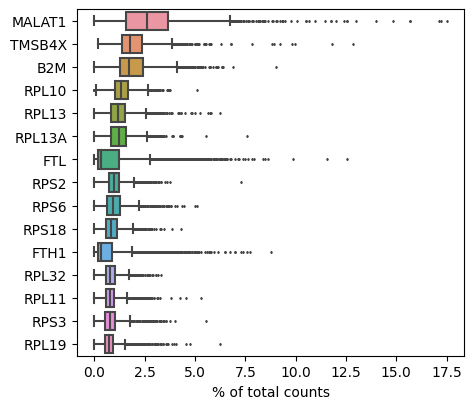

In [16]:
# Plotting
# --------
# pl -> Plotting library for ScanPy

# Showing genes with the highest frequency
# --------------------------------------------------
sc.pl.highest_expr_genes(adata, n_top=15, )

---------------

### Basic Filtering

---------------

In [17]:
# This is an industry standard.
# We can filter by values that we require

# Filtering out cells with fewer than 200 genes
sc.pp.filter_cells(adata, min_genes=200)

# Filtering out genes that are found in fewer than 3 cells.
sc.pp.filter_genes(adata, min_cells=3)

In [18]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [51]:
adata.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
TNFRSF4,ENSG00000186827,155,False,155,0.077407,94.259259,209.0,True,0.277410,2.086050,0.665406,-3.244448e-10,0.424481
CPSF3L,ENSG00000127054,202,False,202,0.094815,92.518519,256.0,True,0.385194,4.506987,2.955005,-1.157975e-10,0.460416
ATAD3C,ENSG00000215915,9,False,9,0.009259,99.666667,25.0,True,0.038252,3.953486,4.352607,8.472988e-12,0.119465
C1orf86,ENSG00000162585,501,False,501,0.227778,81.444444,615.0,True,0.678283,2.713522,0.543183,3.502168e-10,0.685145
RER1,ENSG00000157916,608,False,608,0.298148,77.481481,805.0,True,0.814813,3.447533,1.582528,9.461503e-11,0.736050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICOSLG,ENSG00000160223,34,False,34,0.016667,98.740741,45.0,True,0.082016,2.585818,1.652185,9.984445e-12,0.217672
SUMO3,ENSG00000184900,570,False,570,0.292963,78.888889,791.0,True,0.804815,4.046776,2.431045,-3.911696e-10,0.723121
SLC19A1,ENSG00000173638,31,False,31,0.018519,98.851852,50.0,True,0.058960,3.234231,2.932458,-1.969986e-10,0.173017
S100B,ENSG00000160307,94,False,94,0.076667,96.518519,207.0,True,0.286282,3.042992,1.078783,5.980517e-10,0.399946


In [20]:
adata.obs

,n_genes
AAACATACAACCAC-1,781
AAACATTGAGCTAC-1,1352
AAACATTGATCAGC-1,1131
AAACCGTGCTTCCG-1,960
AAACCGTGTATGCG-1,522
...,...
TTTCGAACTCTCAT-1,1155
TTTCTACTGAGGCA-1,1227
TTTCTACTTCCTCG-1,622
TTTGCATGAGAGGC-1,454


In [21]:
# # Looking the Data
# # ----------------

# df_sc = adata.to_df()
# df_sc.reset_index(inplace=True)
# print("Shape of Data - ",df_sc.shape)
# display(df_sc.head())

--------------------------------------
### Mitochonrial Genes - Quality Control

Let’s assemble some information about mitochondrial genes, which are important for quality control.

High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane. 

Cited from - `“Simple Single Cell” workflows (Lun, McCarthy & Marioni, 2017)`

--------------------------------------

In [22]:
adata.var

,gene_ids,n_cells
AL627309.1,ENSG00000237683,9
AP006222.2,ENSG00000228463,3
RP11-206L10.2,ENSG00000228327,5
RP11-206L10.9,ENSG00000237491,3
LINC00115,ENSG00000225880,18
...,...,...
AC145212.1,ENSG00000215750,16
AL592183.1,ENSG00000220023,323
AL354822.1,ENSG00000215615,8
PNRC2-1,ENSG00000215700,110


In [23]:
adata.obs

,n_genes
AAACATACAACCAC-1,781
AAACATTGAGCTAC-1,1352
AAACATTGATCAGC-1,1131
AAACCGTGCTTCCG-1,960
AAACCGTGTATGCG-1,522
...,...
TTTCGAACTCTCAT-1,1155
TTTCTACTGAGGCA-1,1227
TTTCTACTTCCTCG-1,622
TTTGCATGAGAGGC-1,454


In [24]:
# Since this is the data for a mouse, Mitochondrial genes are annotated from "MT" to "mt"

# Annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('MT-') 



In [25]:
# Calculating the Metrics - Quality Control
# -----------------------------------------
sc.pp.calculate_qc_metrics(adata, 
                           qc_vars=['mt'],
                           percent_top=None, 
                           log1p=False, 
                           inplace=True)

#
# pct - pressure cycle technology - 
#
#   minimizes sample pre-treatment steps and minimizes sample loss for low volumes of valuable samples
#
#   Reference - https://www.creative-proteomics.com/ngpro/pct-dia-services.html

In [26]:
display(adata.var)
display(adata.obs)

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,ENSG00000237683,9,False,9,0.003333,99.666667,9.0
AP006222.2,ENSG00000228463,3,False,3,0.001111,99.888889,3.0
RP11-206L10.2,ENSG00000228327,5,False,5,0.001852,99.814815,5.0
RP11-206L10.9,ENSG00000237491,3,False,3,0.001111,99.888889,3.0
LINC00115,ENSG00000225880,18,False,18,0.006667,99.333333,18.0
...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,False,16,0.006667,99.407407,18.0
AL592183.1,ENSG00000220023,323,False,323,0.134815,88.037037,364.0
AL354822.1,ENSG00000215615,8,False,8,0.002963,99.703704,8.0
PNRC2-1,ENSG00000215700,110,False,110,0.042963,95.925926,116.0


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


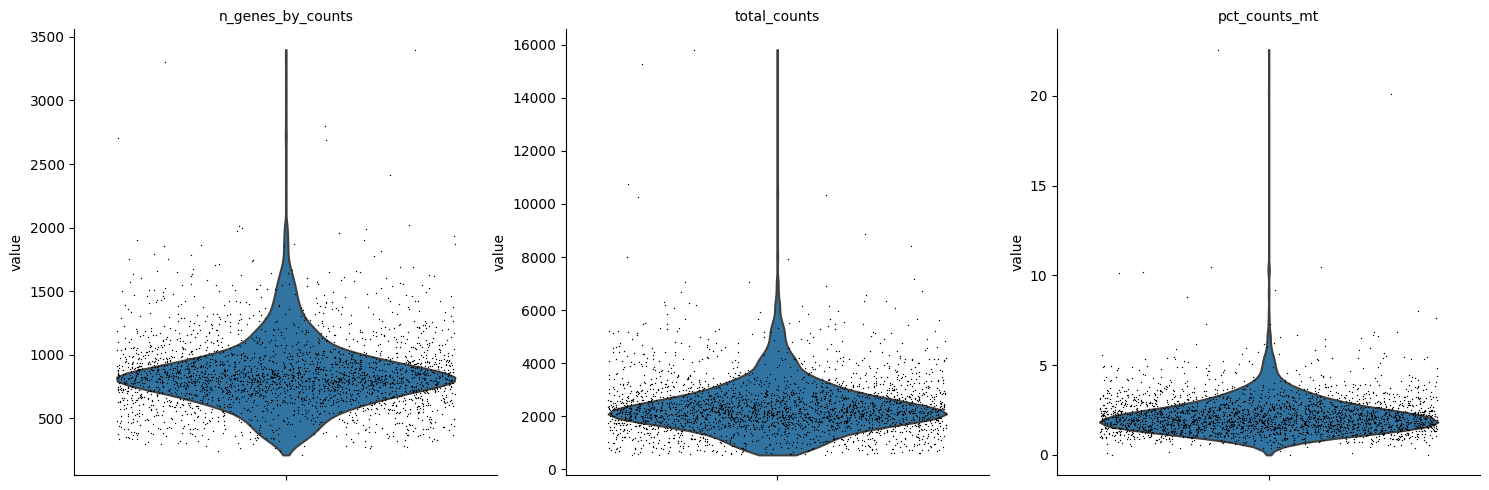

In [27]:
# Plotting - Violin Plot 
# -----------------------
#
# This shows the distribution of the metric's results.
#
# A violin plot of some of the computed quality measures:
# - the number of genes expressed in the count matrix
# - the total counts per cell
# - the percentage of counts in mitochondrial genes
# -------------------------------------------------------------
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

Remove cells that have too many mitochondrial genes expressed or too many total counts

-------------------------------

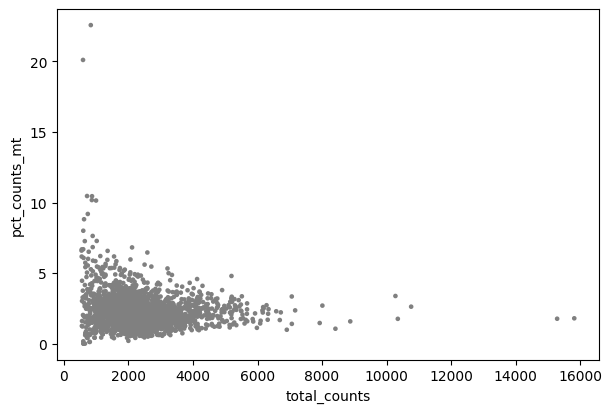

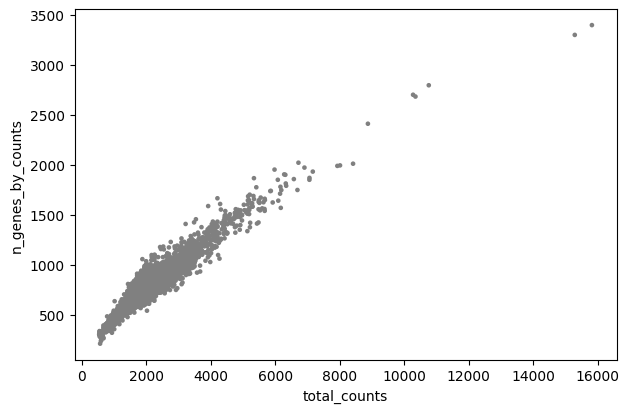

In [28]:
# Plotting - Scatterplot
# ----------------------
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

----------------------------------------

----------------------------------------

In [29]:
display(adata.var)
display(adata.obs)

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,ENSG00000237683,9,False,9,0.003333,99.666667,9.0
AP006222.2,ENSG00000228463,3,False,3,0.001111,99.888889,3.0
RP11-206L10.2,ENSG00000228327,5,False,5,0.001852,99.814815,5.0
RP11-206L10.9,ENSG00000237491,3,False,3,0.001111,99.888889,3.0
LINC00115,ENSG00000225880,18,False,18,0.006667,99.333333,18.0
...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,False,16,0.006667,99.407407,18.0
AL592183.1,ENSG00000220023,323,False,323,0.134815,88.037037,364.0
AL354822.1,ENSG00000215615,8,False,8,0.002963,99.703704,8.0
PNRC2-1,ENSG00000215700,110,False,110,0.042963,95.925926,116.0


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


In [30]:
# Filtering by Slicing the anndata
# --------------------------------
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

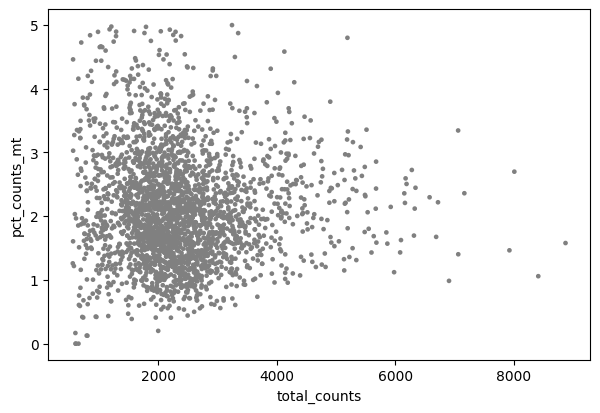

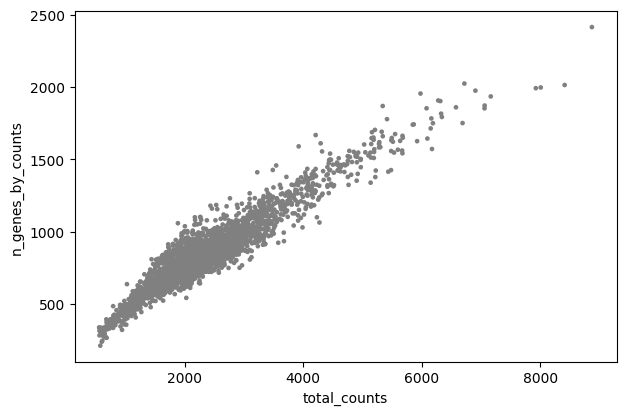

In [31]:
# Plotting - Scatterplot
# ----------------------
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [32]:
# Raw matrix before normalization
# 
# Summing all the values of each individual cell
print(adata.X[0,:].sum())
print(adata.X[1,:].sum())
print(adata.X[20,:].sum())
print(adata.X[40,:].sum())

2419.0
4903.0
3281.0
2357.0


In [33]:
# Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, 
#  so that counts become comparable among cells
#
# Normalization is done to - make the column sum nearly the same
#    Number of cells should be comparable for analysis
# 
sc.pp.normalize_total(adata, target_sum=10000)

In [34]:
# Raw matrix after normalization
# 
# Summing all the values of each individual cell
print(adata.X[0,:].sum())
print(adata.X[1,:].sum())
print(adata.X[20,:].sum())
print(adata.X[40,:].sum())

9999.966
10000.049
10000.0
10000.033


In [35]:
# Applying log yo the data
#
# log is applied after adding 1 (+1) to the values. 
# This is done to make any 0 values 1.
# 
sc.pp.log1p(adata)

In [36]:
# Raw matrix after normalization
# 
# Summing all the values of each individual cell
print(adata.X[0,:].sum())
print(adata.X[1,:].sum())
print(adata.X[20,:].sum())
print(adata.X[40,:].sum())

1605.8203
2027.8444
1842.5238
1715.6285


In [37]:
# 
# Most of the analysis will be done with variable genes, so we need to filter them
# 
# Identifying the higly variable genes
# ------------------------------------
sc.pp.highly_variable_genes(adata, 
                            min_mean=0.0125, 
                            max_mean=3, 
                            min_disp=0.5)

display(adata.var)
display(adata.obs)

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
AL627309.1,ENSG00000237683,9,False,9,0.003333,99.666667,9.0,False,0.013556,1.432845,-0.624328
AP006222.2,ENSG00000228463,3,False,3,0.001111,99.888889,3.0,False,0.004696,1.458631,-0.573416
RP11-206L10.2,ENSG00000228327,5,False,5,0.001852,99.814815,5.0,False,0.005673,1.325459,-0.836358
RP11-206L10.9,ENSG00000237491,3,False,3,0.001111,99.888889,3.0,False,0.002644,0.859264,-1.756848
LINC00115,ENSG00000225880,18,False,18,0.006667,99.333333,18.0,False,0.027437,1.457477,-0.575693
...,...,...,...,...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,False,16,0.006667,99.407407,18.0,False,0.027441,1.784637,0.070275
AL592183.1,ENSG00000220023,323,False,323,0.134815,88.037037,364.0,False,0.485051,1.859941,-0.437388
AL354822.1,ENSG00000215615,8,False,8,0.002963,99.703704,8.0,False,0.012157,1.781924,0.064919
PNRC2-1,ENSG00000215700,110,False,110,0.042963,95.925926,116.0,False,0.160366,1.567491,-0.358474


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


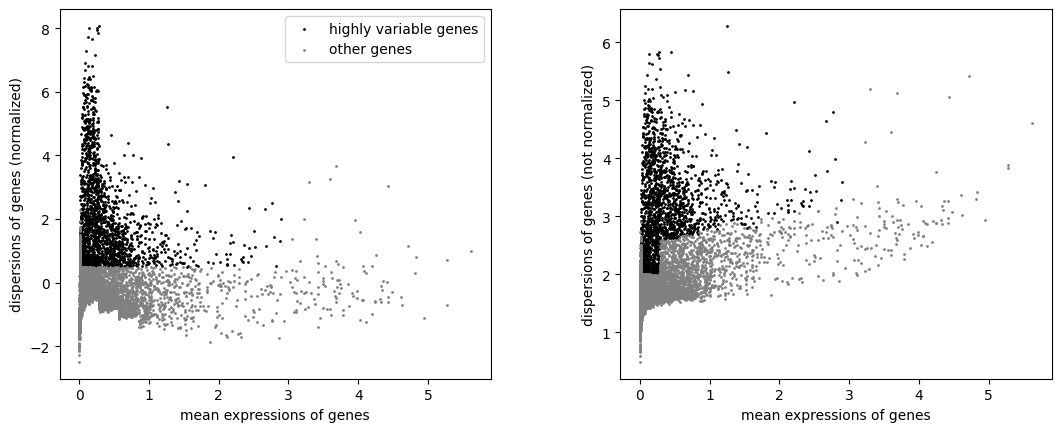

In [38]:
# Plotting the highly variable genes
# ----------------------------------
sc.pl.highly_variable_genes(adata)

In [39]:
# Set the .raw attribute of the AnnData object to the normalized and logarithmized 
# raw gene expression for later use in differential testing and visualizations of gene expression. 
# This simply freezes the state of the AnnData object.
# ------------------------------------------------------------------------------------------------
adata.raw = adata

# We can get back an AnnData of the object in .raw by calling .raw.to_adata().
#

In [40]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

------------------------------

The result of the previous highly-variable-genes detection is stored as an annotation in .var.highly_variable and auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. 

In that case, the step actually do the filtering below is unnecessary, too.

------------------------------

In [41]:
# Filtering the highly variable data
# 
adata = adata[:, adata.var.highly_variable]

In [42]:
display(adata.var)
display(adata.obs)

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
TNFRSF4,ENSG00000186827,155,False,155,0.077407,94.259259,209.0,True,0.277410,2.086050,0.665406
CPSF3L,ENSG00000127054,202,False,202,0.094815,92.518519,256.0,True,0.385194,4.506987,2.955005
ATAD3C,ENSG00000215915,9,False,9,0.009259,99.666667,25.0,True,0.038252,3.953486,4.352607
C1orf86,ENSG00000162585,501,False,501,0.227778,81.444444,615.0,True,0.678283,2.713522,0.543183
RER1,ENSG00000157916,608,False,608,0.298148,77.481481,805.0,True,0.814813,3.447533,1.582528
...,...,...,...,...,...,...,...,...,...,...,...
ICOSLG,ENSG00000160223,34,False,34,0.016667,98.740741,45.0,True,0.082016,2.585818,1.652185
SUMO3,ENSG00000184900,570,False,570,0.292963,78.888889,791.0,True,0.804815,4.046776,2.431045
SLC19A1,ENSG00000173638,31,False,31,0.018519,98.851852,50.0,True,0.058960,3.234231,2.932458
S100B,ENSG00000160307,94,False,94,0.076667,96.518519,207.0,True,0.286282,3.042992,1.078783


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


In [43]:
# Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed.
# 
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [44]:
# Scale the data to unit variance.
# Clip values exceeding standard deviation 10.
# 
sc.pp.scale(adata, max_value=10)

--------------------------------------
### Dimensionality Reduction - Principal Component Analysis

`This reveals the main axes of variation and denoises the data.`

-------------------------------

In [45]:
# Principal Component Analysis (PCA)
# ----------------------------------
#
sc.tl.pca(adata, svd_solver='arpack')

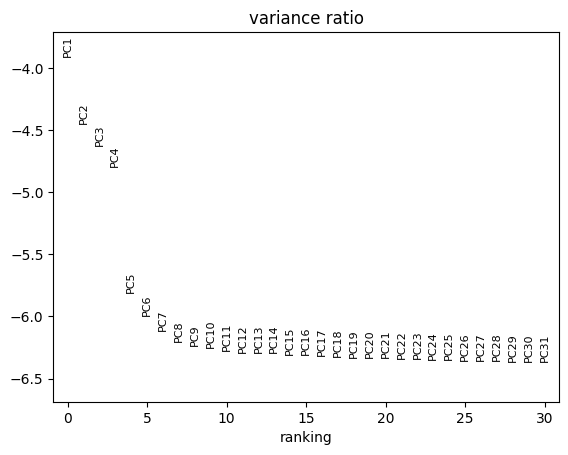

In [46]:
# Viewing the components - with respect to variance of Data
# ----------------------   --------------------------------
# This gives us information about how many PCs we should consider in order to 
#    compute the neighborhood relations of cells.
# 
sc.pl.pca_variance_ratio(adata, log=True)

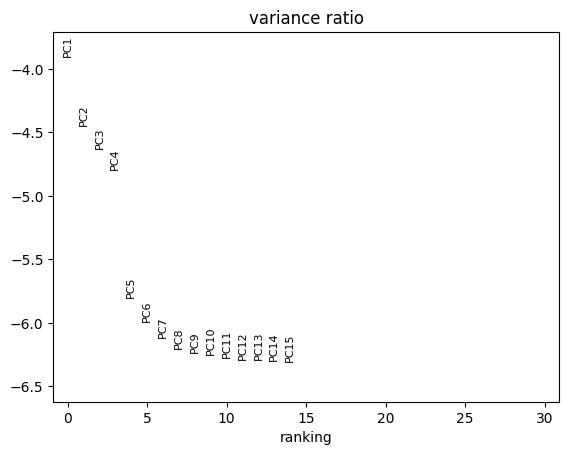

In [47]:
sc.tl.pca(adata, svd_solver = 'arpack', n_comps=15)

# Viewing the components - with respect to variance of Data
# ----------------------   --------------------------------
sc.pl.pca_variance_ratio(adata, log=True)

In [48]:
adata.var_names

Index(['TNFRSF4', 'CPSF3L', 'ATAD3C', 'C1orf86', 'RER1', 'TNFRSF25', 'TNFRSF9',
       'CTNNBIP1', 'SRM', 'UBIAD1',
       ...
       'DSCR3', 'BRWD1', 'BACE2', 'SIK1', 'C21orf33', 'ICOSLG', 'SUMO3',
       'SLC19A1', 'S100B', 'PRMT2'],
      dtype='object', length=1838)

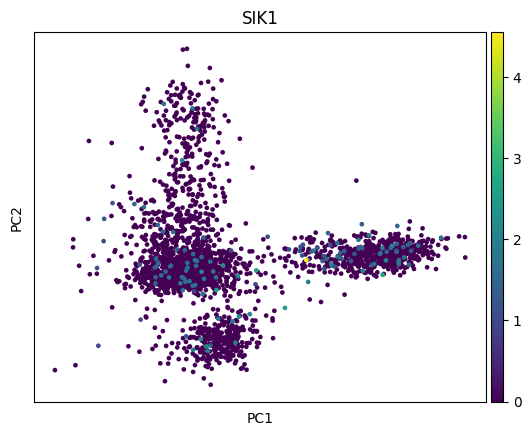

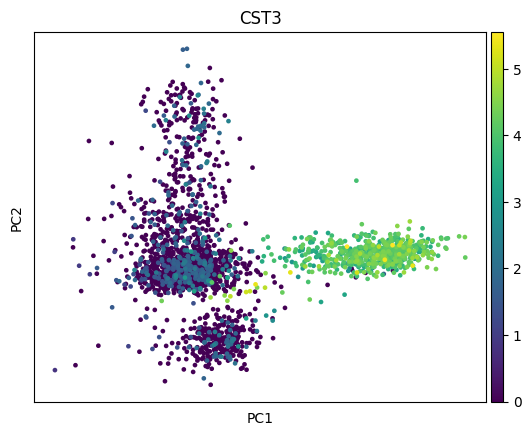

In [49]:
# Scatter plot in the PCA coordinates
# -----------------------------------
sc.pl.pca(adata, color='SIK1')
sc.pl.pca(adata, color='CST3')

In [50]:
# Writing results to file
# -----------------------
adata.write(results_file)